In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load Banknote Authentication dataset
df = pd.read_csv("../Data/data_banknote_authentication.txt", header=None)
df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

X = df.iloc[:, :-1].values
y = df["class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

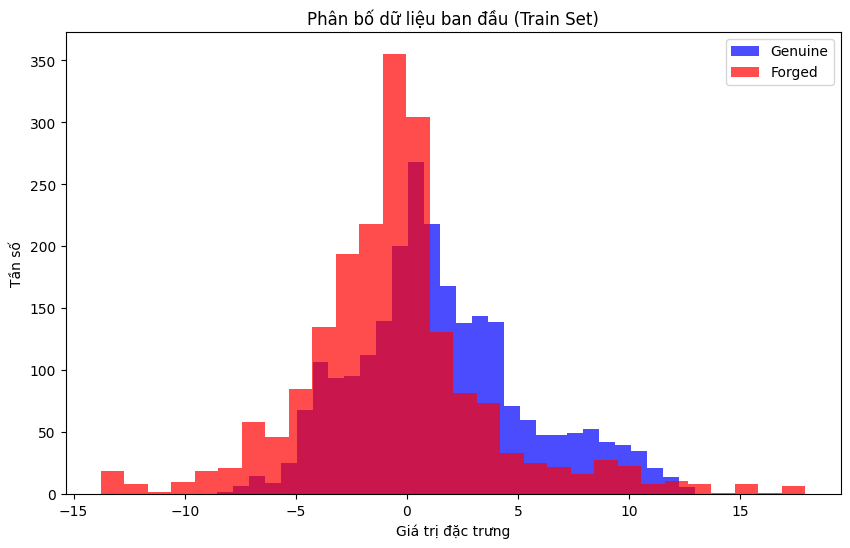

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(X_train[y_train == 0].flatten(), bins=30, alpha=0.7, label="Genuine", color='blue')
plt.hist(X_train[y_train == 1].flatten(), bins=30, alpha=0.7, label="Forged", color='red')
plt.title("Phân bố dữ liệu ban đầu (Train Set)")
plt.xlabel("Giá trị đặc trưng")
plt.ylabel("Tần số")
plt.legend()
plt.show()

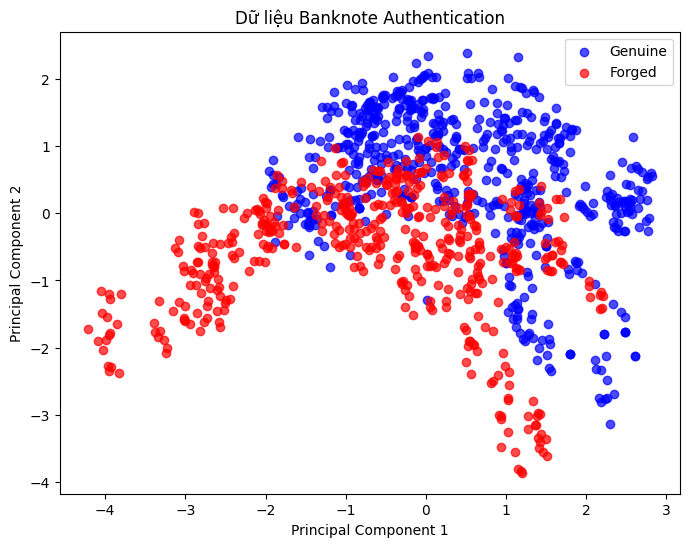

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[y_train == 0, 0], X_pca_2d[y_train == 0, 1], label="Genuine", alpha=0.7, c='blue')
plt.scatter(X_pca_2d[y_train == 1, 0], X_pca_2d[y_train == 1, 1], label="Forged", alpha=0.7, c='red')
plt.title("Dữ liệu Banknote Authentication")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

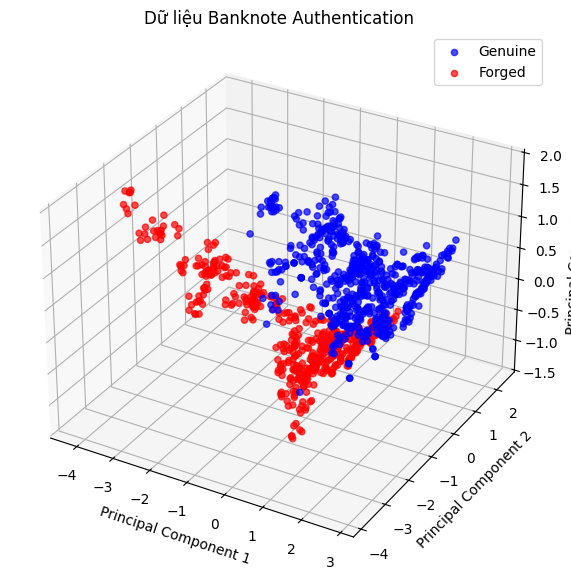

In [5]:
# PCA 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[y_train == 0, 0], X_pca_3d[y_train == 0, 1], X_pca_3d[y_train == 0, 2], label="Genuine", alpha=0.7, c='blue')
ax.scatter(X_pca_3d[y_train == 1, 0], X_pca_3d[y_train == 1, 1], X_pca_3d[y_train == 1, 2], label="Forged", alpha=0.7, c='red')
ax.set_title("Dữ liệu Banknote Authentication")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()

In [6]:
# LDA

# Calculate mean of each class
mean_0 = np.mean(X_train_scaled[y_train == 0], axis=0)
mean_1 = np.mean(X_train_scaled[y_train == 1], axis=0)

# Calculate scatter within-class (SW)
SW = np.zeros((X.shape[1], X.shape[1]))
for i, mean in zip([0, 1], [mean_0, mean_1]):
    X_class = X_train_scaled[y_train == i]
    SW += (X_class - mean).T @ (X_class - mean)

# Calculate scatter between-class (SB)
SB = np.outer((mean_0 - mean_1), (mean_0 - mean_1))

# Calculate optimal vector
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(SW) @ SB)
w = eigen_vectors[:, np.argmax(eigen_values)].real.reshape(-1, 1)

# Projecting data onto LDA vectors
X_train_lda = X_train_scaled @ w
X_test_lda = X_test_scaled @ w

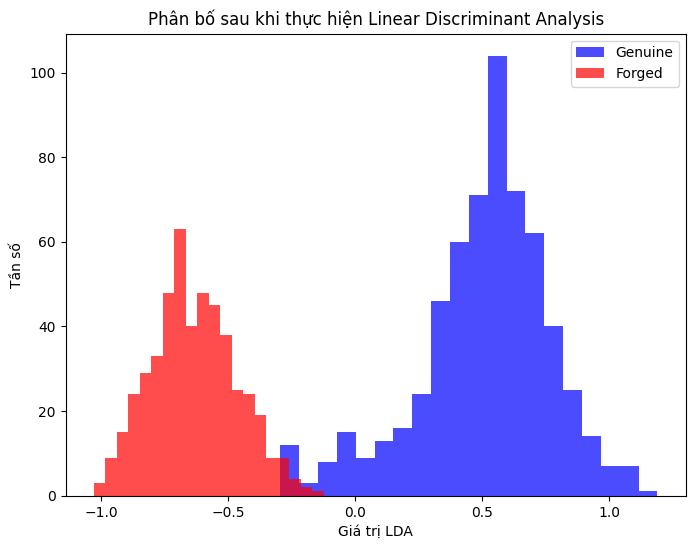

In [7]:
# Visualization LDA
title = "Phân bố sau khi thực hiện Linear Discriminant Analysis"
plt.figure(figsize=(8, 6))
plt.hist(X_train_lda[y_train == 0], bins=20, alpha=0.7, label="Genuine", color='blue')
plt.hist(X_train_lda[y_train == 1], bins=20, alpha=0.7, label="Forged", color='red')
plt.title(title)
plt.xlabel("Giá trị LDA")
plt.ylabel("Tần số")
plt.legend()
plt.show()

In [10]:
m_0_lda = np.mean(X_train_lda[y_train == 0])
m_1_lda = np.mean(X_train_lda[y_train == 1])

def nearest_centroid_classifier(X_lda, m_0, m_1):
    return np.where(np.abs(X_lda - m_0) < np.abs(X_lda - m_1), 0, 1)

y_pred = nearest_centroid_classifier(X_test_lda, m_0_lda, m_1_lda)

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"LDA Accuracy on test set: {accuracy:.2f}%")

LDA Accuracy on test set: 96.73%
